# Task 4: Working with an Image Tensor

In this notebook, we'll work with image data using NumPy tensor operations. We'll cover:

1. Loading and preparing image data
2. Basic image transformations
3. Grayscale conversion
4. Image augmentations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

np.random.seed(42)

## 1. Loading and Preparing Image Data

First, we need to load an image and prepare it for processing:
1. We'll download a sample image if it doesn't exist already
2. Read it as a NumPy array using PIL.Image
3. Crop the top-left corner to shape (64, 64, 3)

Original image shape: (1024, 1024, 3)
Data type: uint8
Min value: 0, Max value: 255
[121 225 216]
Cropped image shape: (64, 64, 3)


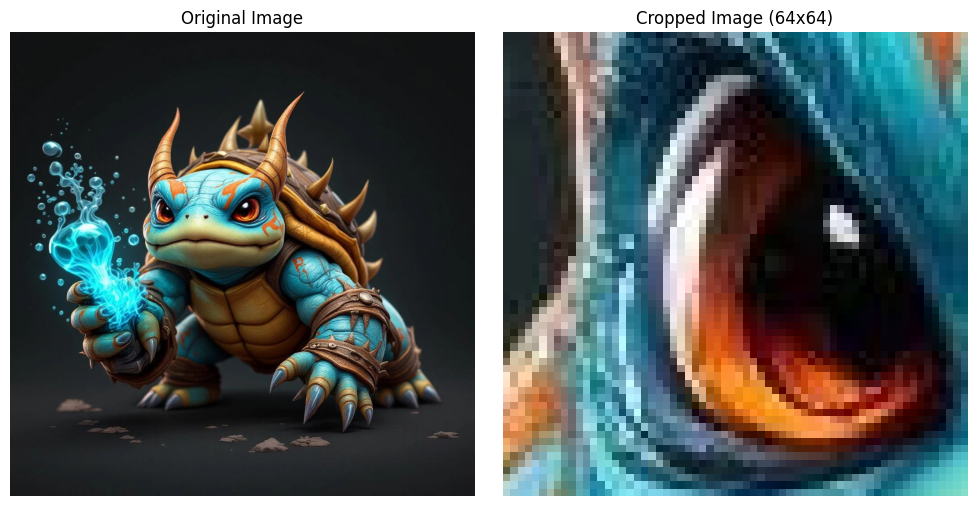

In [ ]:
image_dir = os.path.join(os.path.dirname(os.getcwd()), "images")
os.makedirs(image_dir, exist_ok=True)

image_path = os.path.join(image_dir, "sample_image.jpg")
img = Image.open(image_path)
img_array = np.array(img)

print(f"Original image shape: {img_array.shape}")
print(f"Data type: {img_array.dtype}")
print(f"Min value: {img_array.min()}, Max value: {img_array.max()}")

cropped_img = img_array[364:428, 300:364, :]
print(img_array[400, 400])
print(f"Cropped image shape: {cropped_img.shape}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array)

plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cropped_img)

plt.title('Cropped Image (64x64)')
plt.axis('off')
plt.tight_layout()
plt.show()

## 2. Indexing and Simple Transformations

Now let's perform some basic transformations on the image:
1. Print pixel values at the center (32, 32) (all 3 channels)
2. Extract the red channel (I[:, :, 0])
3. Invert the image: I_inv = 255 - I

Pixel values at center (32, 32): [101  56  51]
RGB values: R=101, G=56, B=51
[[ 29  30  31 ... 179 204 187]
 [ 29  30  30 ... 170 196 170]
 [ 33  31  31 ... 159 184 168]
 ...
 [152 176 160 ...  94 103 109]
 [188 171 138 ... 104 111 120]
 [177 145 136 ... 116 123 132]]
Shape of the red channel: (64, 64)


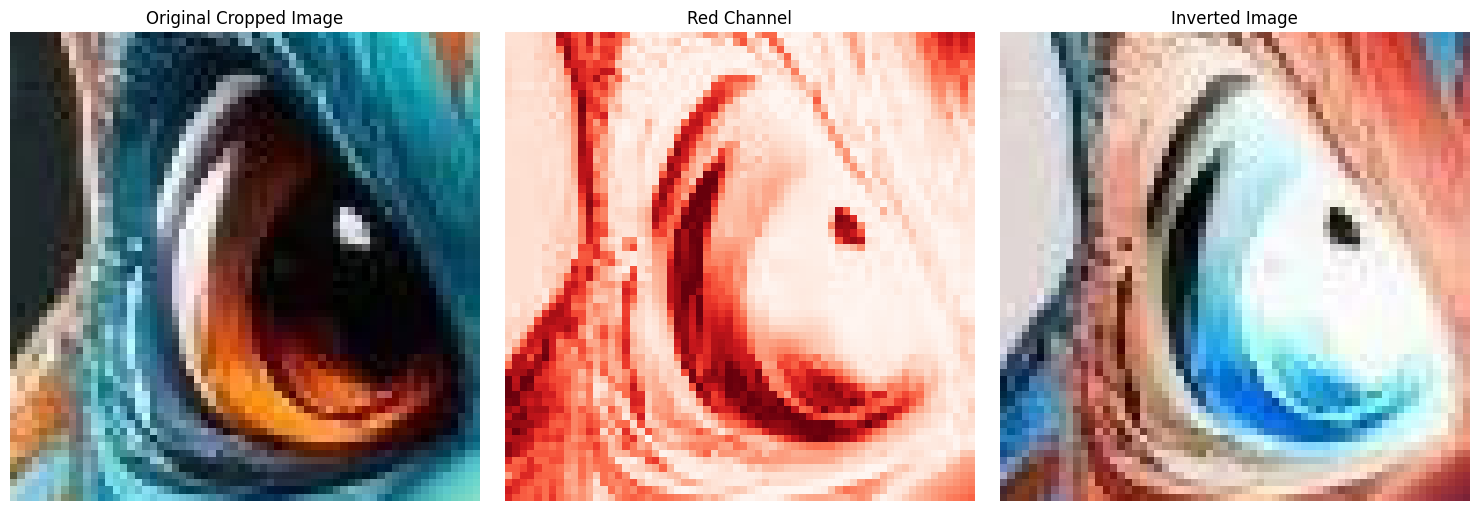

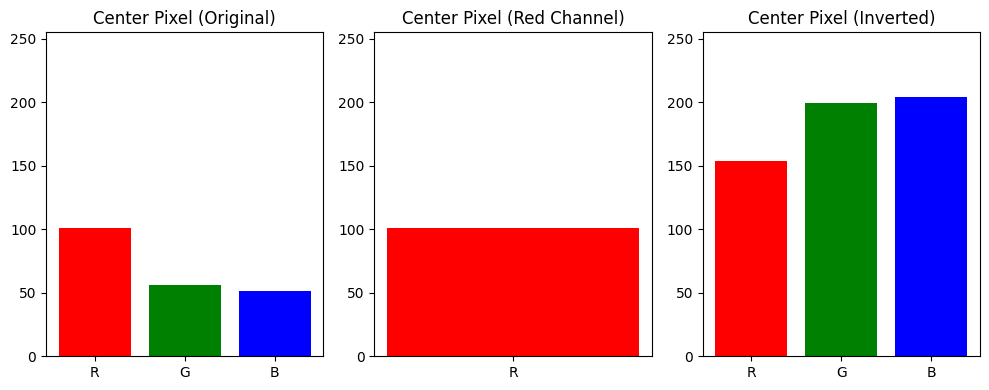

In [ ]:
center_pixel = cropped_img[32, 32, :]
print(f"Pixel values at center (32, 32): {center_pixel}")
print(f"RGB values: R={center_pixel[0]}, G={center_pixel[1]}, B={center_pixel[2]}")

red_channel = cropped_img[:, :, 0]
print(red_channel)
print(f"Shape of the red channel: {red_channel.shape}")

inverted_img = 255 - cropped_img
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cropped_img)

plt.title('Original Cropped Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(red_channel, cmap='Reds')

plt.title('Red Channel')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(inverted_img)

plt.title('Inverted Image')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(['R', 'G', 'B'], center_pixel, color=['red', 'green', 'blue'])
plt.title('Center Pixel (Original)')
plt.ylim(0, 255)
plt.subplot(1, 3, 2)

plt.bar(['R'], red_channel[32, 32], color='red')
plt.title('Center Pixel (Red Channel)')
plt.ylim(0, 255)
plt.subplot(1, 3, 3)

plt.bar(['R', 'G', 'B'], inverted_img[32, 32], color=['red', 'green', 'blue'])
plt.title('Center Pixel (Inverted)')
plt.ylim(0, 255)
plt.tight_layout()
plt.show()

## 3. Grayscale Conversion

Now let's convert the image to grayscale:
1. Using the formula: Gray = 0.299*R + 0.587*G + 0.114*B
2. Normalize to range [0, 1]
3. Compute the average brightness of the image

Grayscale image shape: (64, 64)
Grayscale data type: uint8
Grayscale range: [0, 254]
68
0.26666666666666666
Average brightness: 0.3275


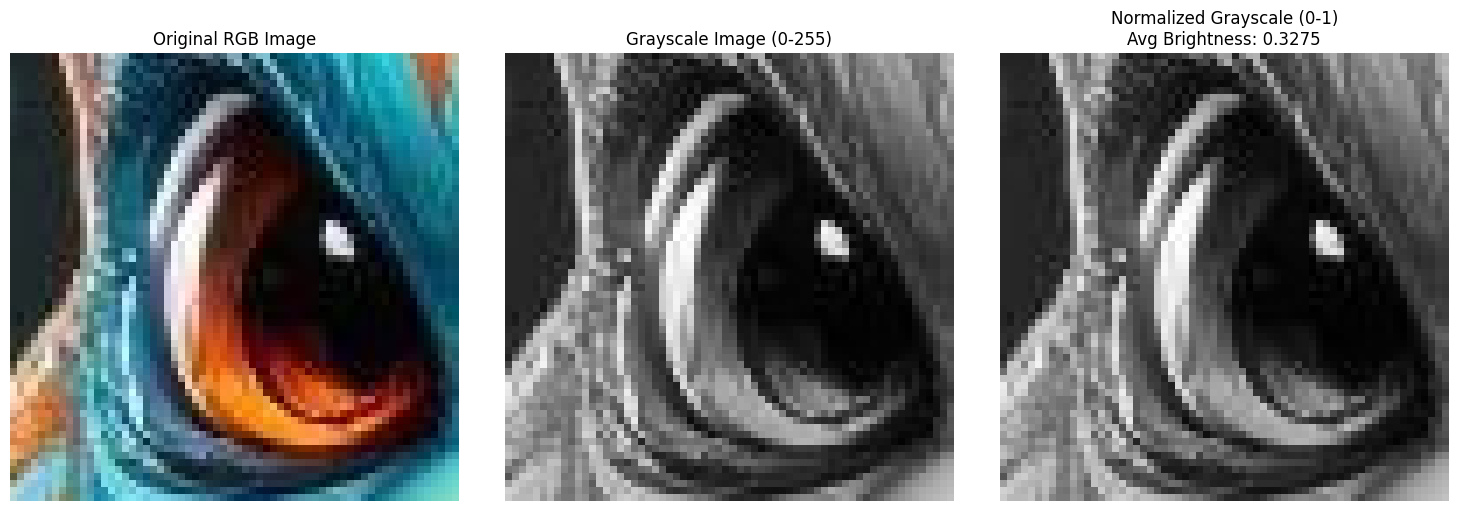

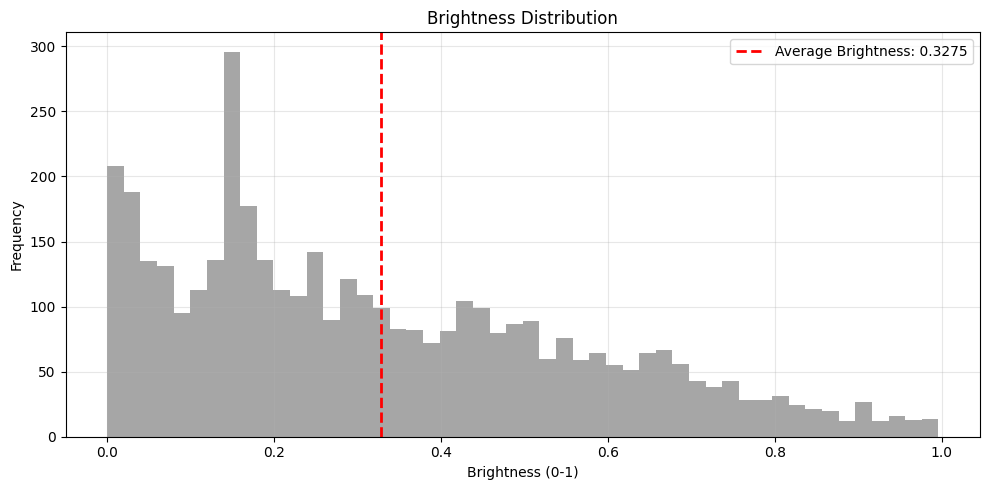

In [ ]:
R = cropped_img[:, :, 0]
G = cropped_img[:, :, 1]
B = cropped_img[:, :, 2]
grayscale = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8)
print(f"Grayscale image shape: {grayscale.shape}")
print(f"Grayscale data type: {grayscale.dtype}")
print(f"Grayscale range: [{grayscale.min()}, {grayscale.max()}]")
print(grayscale[32, 32])

grayscale_norm = grayscale / 255.0
print(grayscale_norm[32, 32])
avg_brightness = np.mean(grayscale_norm)
print(f"Average brightness: {avg_brightness:.4f}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cropped_img)
plt.title('Original RGB Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(grayscale, cmap='gray')

plt.title('Grayscale Image (0-255)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(grayscale_norm, cmap='gray')

plt.title(f'Normalized Grayscale (0-1)\nAvg Brightness: {avg_brightness:.4f}')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(grayscale_norm.flatten(), bins=50, color='gray', alpha=0.7)
plt.axvline(avg_brightness, color='red', linestyle='dashed', linewidth=2, label=f'Average Brightness: {avg_brightness:.4f}')
plt.title('Brightness Distribution')
plt.xlabel('Brightness (0-1)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 4. Image Augmentations

Finally, let's apply some common image augmentation techniques:
1. Flip the image horizontally
2. Rotate the image by 90°
3. Resize to (32, 32, 3) by averaging 2×2 blocks

Shape of flipped image: (64, 64, 3)
Shape of rotated image: (64, 64, 3)
Shape of resized image: (32, 32, 3)


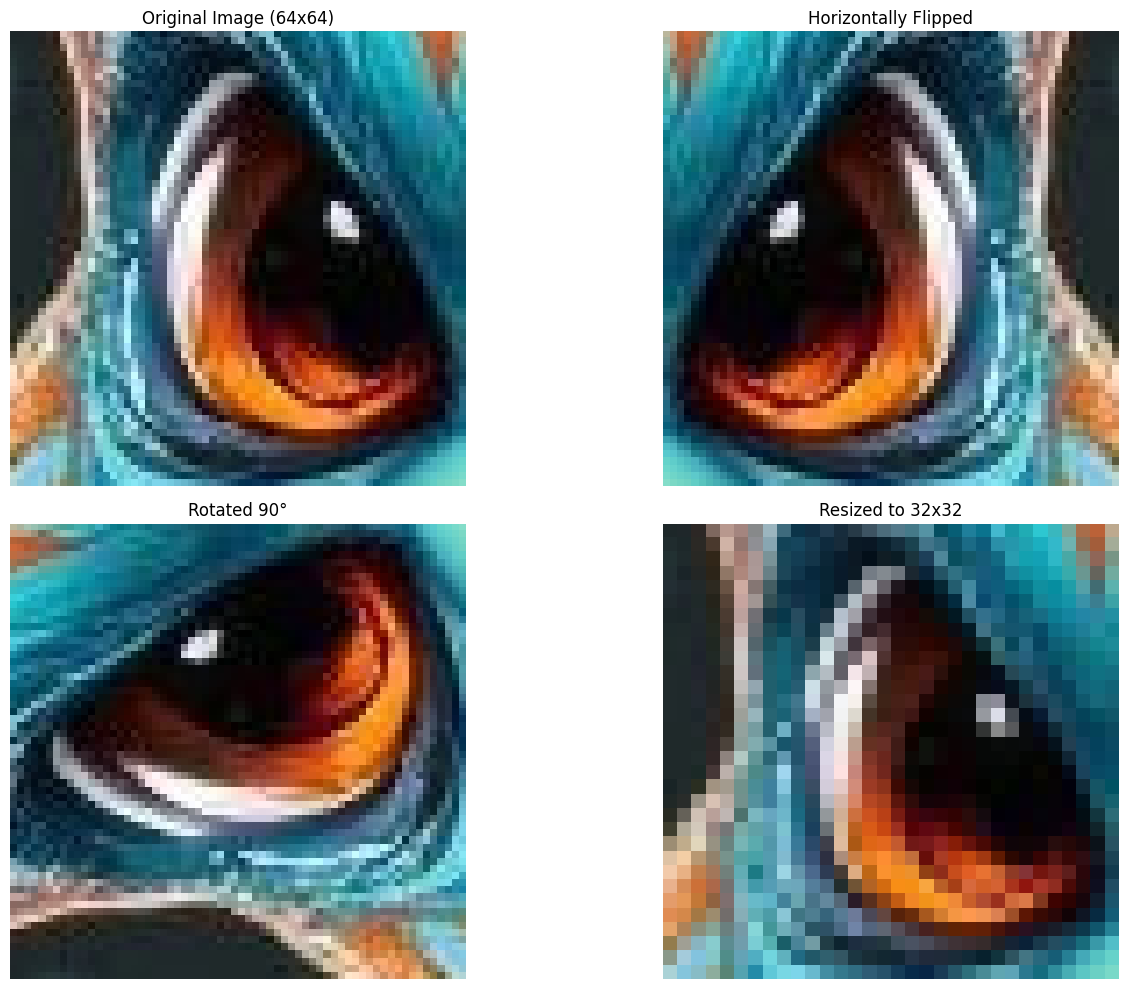

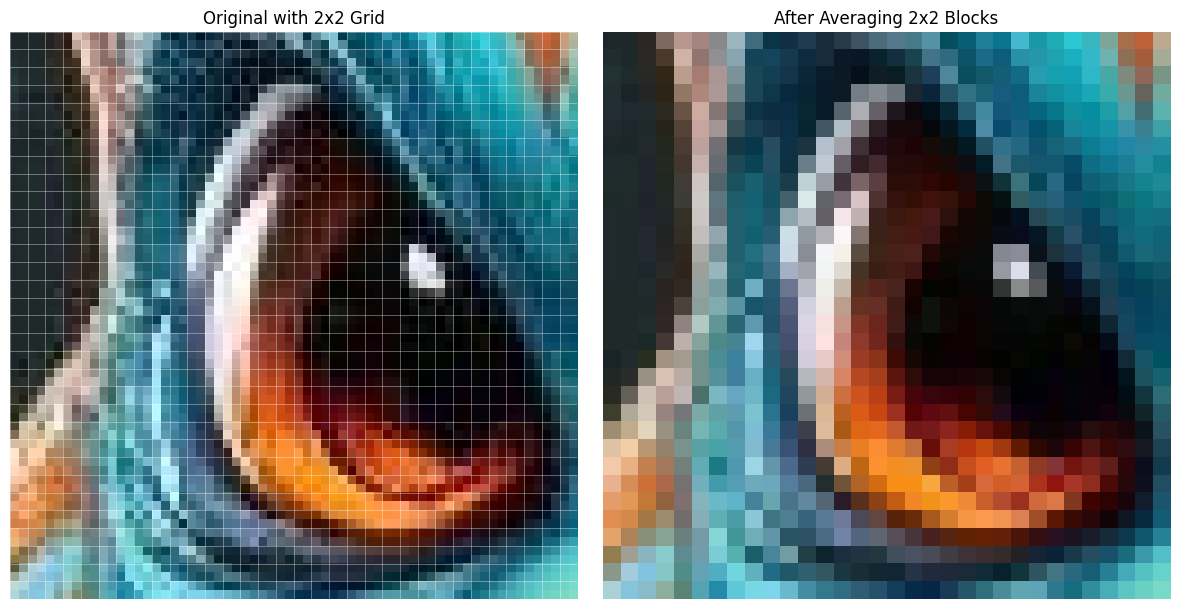

In [ ]:
flipped_img = np.fliplr(cropped_img)
print(f"Shape of flipped image: {flipped_img.shape}")

rotated_img = np.rot90(cropped_img)
print(f"Shape of rotated image: {rotated_img.shape}")

reshaped = cropped_img.reshape(32, 2, 32, 2, 3)
resized_img = reshaped.mean(axis=(1, 3)).astype(np.uint8)
print(f"Shape of resized image: {resized_img.shape}")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cropped_img)

plt.title('Original Image (64x64)')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(flipped_img)

plt.title('Horizontally Flipped')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(rotated_img)

plt.title('Rotated 90°')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resized_img)

plt.title('Resized to 32x32')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cropped_img)

plt.title('Original with 2x2 Grid')
plt.axis('off')
for i in range(0, 64, 2):
    plt.axhline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)
    plt.axvline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)
plt.subplot(1, 2, 2)

plt.imshow(resized_img)
plt.title('After Averaging 2x2 Blocks')
plt.axis('off')
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we worked with image data using NumPy tensor operations. We:

1. **Loaded and prepared an image** by reading it as a NumPy array and cropping it to a specific size
2. **Applied basic transformations** including extracting color channels and inverting the image
3. **Converted to grayscale** using a weighted formula and normalized the values
4. **Applied image augmentations** like flipping, rotating, and resizing

These operations demonstrate how NumPy can be used for image processing tasks without requiring specialized image processing libraries. The tensor representation of images (with shape height × width × channels) allows for efficient and flexible manipulation using NumPy's array operations.